In [2]:
import numpy as np
import pickle
import os
import math
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline

In [107]:
def get_results(results_path,pop_size,update_time,case,phrase):
    
    
    files = os.listdir('{}{}'.format(results_path,case))
    
    steps = []

    #check population and pop_size,update_time
    files = [f for f in files if '.DS' not in f and pop_size in f and phrase in f and 'update_days_{}'.format(update_time) in f  and '2015' not in f    ]
    #files = files[:50]
    #print(len(files))
    #print(files)
    seen = 0 
    regrets = {}
    actions = {}
    mus = {}
    for ff in files:
        #sim = int(ff.split('sim_')[1].strip('_continuous_pretreatment_base_coef_scale_hybrid.pkl'))
        #try:
        with open('{}{}/{}'.format(results_path,case,ff),'rb') as f:
            d = pickle.load(f)
            #return d
            #print(d.keys())
            if len(d)>0:
            #if int(sim)<60:
                #print(len([k['steps'] for k in d['history'].values() if k['avail'] and k['decision_time']]))
                steps = steps+[k['steps'] for k in d['history'].values() if k['avail'] and k['decision_time']]
                for k,v in d['actions'].items():
                    if k not in actions:
                        actions[k]=[]
                    actions[k].extend(v)
                for k,v in d['regrets'].items():
                    if k not in regrets:
                        regrets[k]=[]
                    regrets[k].extend(v)
            seen = seen+1
           # print(ff)
    print(seen)
    return {'steps':steps,'regrets':regrets,'actions':actions}

In [102]:
def get_to_plot_actions(actions):
    
    skeys = sorted(actions.keys())
    to_plot = []
    for k in skeys:
        to_plot.append(sum(actions[k])/len(actions[k]))
    return to_plot
def get_to_plot_regrets(actions):
    
    skeys = sorted(actions.keys())
    to_plot = []
    for k in skeys:
        to_plot.append(np.array(actions[k]).mean())
    return to_plot

In [103]:
def plot_and_save_dict(d,title,save_title,save=False,i=None,ax=None):
    x =get_to_plot_actions(d['actions'])
    print(np.array(x[150:]).mean())
    #plt.figure(1) 
    #ax[0][i].ylim(.45,1)
    #ax[0][i].yticks(np.arange(.45, 1, step=0.15))
    ax[0][i].plot(x)
    
    plt.ylabel('Percent correct action ')
    plt.xlabel('Decision times')
    plt.title(title)
    if save:
        plt.savefig('{}_{}_percent_correct_action.png'.format(save_title,title))
    to_plotr =  get_to_plot_regrets(d['regrets'])
    #plt.figure(2) 
#to_plotr = [to_plotr[i] for i in range(0,len(to_plotr),5)]
    ax[1][i].plot(to_plotr)
    plt.ylabel('Regret')
    plt.xlabel('Decision times')
    plt.title(title)
    if save:
        plt.savefig('{}_{}_regret.png'.format(save_title,title))

In [135]:
def plot_all(results_path,pop,update,phrase):
    fig, ax = plt.subplots(nrows=2, ncols=3)
    fig.tight_layout()
    cases = ['case_one','case_two','case_three']
    plt.setp(ax[0,:],  yticks = np.arange(.3, 1, step=0.15),ylim = [.45,1])
    plt.setp(ax[1,:],  yticks = np.arange(0, .5, step=0.05),ylim = [0,.5])
    for i in range(len(cases)):
        case = cases[i]
        d = get_results(results_path,str(pop),update,cases[i],phrase)
        
        plot_and_save_dict(d,case,case,save=False,i=i,ax=ax)

50
0.738133508909701
50
0.5468544328772108
50
0.6404346379219292


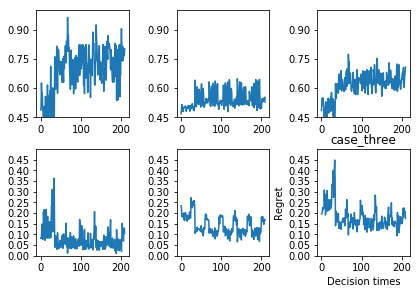

In [203]:
plot_all('../../Downloads/pooling_results/batch/','32',7,'dowpreloccoe')

50
0.6681673658031947
50
0.6515828419112587
50
0.6793302255205524


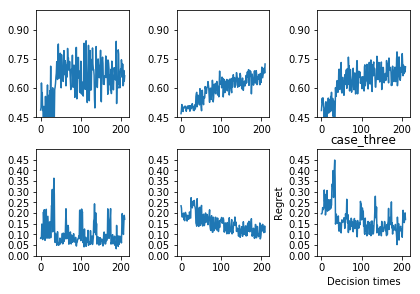

In [202]:
plot_all('../../Downloads/pooling_results/personalized/','32',7,'dowpreloccoe')


In [ ]:
plot_all('../../Downloads/pooling_results/personalized/','32',7,'todpreloccoe')


50
0.6620290780086714
50
0.6505273676057755


AxesSubplot(0.125,0.536818;0.352273x0.343182)
AxesSubplot(0.547727,0.536818;0.352273x0.343182)
AxesSubplot(0.125,0.125;0.352273x0.343182)
AxesSubplot(0.547727,0.125;0.352273x0.343182)


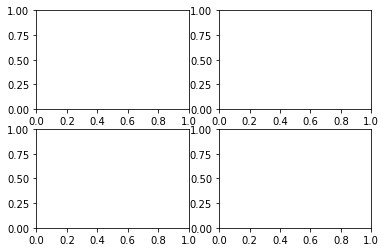

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=2)

for row in ax:
    for col in row:
        print(col)
        print(row)

In [35]:
ax[0][1]